In [1]:
!pip install gtts
!pip install SpeechRecognition


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 8.2.1
    Uninstalling click-8.2.1:
      Successfully uninstalled click-8.2.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 59.0 MB/s eta 0:00:00


In [28]:
import json
import nltk
import time
import random
import string
import pickle
import numpy as np
import pandas as pd
from gtts import gTTS
from io import BytesIO
import tensorflow as tf
import IPython.display as ipd
import speech_recognition as sr
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import Model
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Flatten, Dense, GlobalMaxPool1D

In [3]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [4]:
#Download NLTK Package
# Package sentence tokenizer
nltk.download('punkt')
# Package lemmatization
nltk.download('wordnet')
# Package multilingual wordnet data
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
df={
  "intents": [
    {
      "tag": "greeting_1",
      "patterns": ["hallo"],
      "responses": ["Hai! Saya Robby Saidi Prasetyo. Mau tau informasi tentang apa nih?"]
    },
    {
      "tag": "greeting_2",
      "patterns": ["hai"],
      "responses": ["Halo! Saya Robby, salam kenal ya! Mau tau tentang pengalaman saya?"]
    },
    {
      "tag": "greeting_3",
      "patterns": ["halo"],
      "responses": ["Helo! Ini Robby. Lagi kepo tentang background saya ya?"]
    },
    {
      "tag": "greeting_4",
      "patterns": ["hei"],
      "responses": ["Hei! Senang bertemu dengan Anda. Saya Robby Saidi Prasetyo."]
    },
    {
      "tag": "greeting_5",
      "patterns": ["hi"],
      "responses": ["Hi! Perkenalkan saya Robby, mahasiswa Teknik Informatika."]
    },
    {
      "tag": "greeting_6",
      "patterns": ["hy"],
      "responses": ["Hy! Saya Robby, Junior Machine Learning Enthusiast."]
    },
    {
      "tag": "greeting_7",
      "patterns": ["pagi"],
      "responses": ["Selamat pagi! Saya Robby Saidi Prasetyo, senang berkenalan."]
    },
    {
      "tag": "greeting_8",
      "patterns": ["morning"],
      "responses": ["Good morning! I'm Robby, nice to meet you."]
    },
    {
      "tag": "greeting_9",
      "patterns": ["siang"],
      "responses": ["Selamat siang! Saya Robby, ada yang bisa saya bantu?"]
    },
    {
      "tag": "greeting_10",
      "patterns": ["afternoon"],
      "responses": ["Good afternoon! I'm Robby Saidi Prasetyo, how can I help you?"]
    },
    {
      "tag": "greeting_11",
      "patterns": ["sore"],
      "responses": ["Selamat sore! Saya Robby, mau tau tentang apa?"]
    },
    {
      "tag": "greeting_12",
      "patterns": ["malam"],
      "responses": ["Selamat malam! Saya Robby, masih ada yang bisa saya jelaskan?"]
    },
    {
      "tag": "greeting_13",
      "patterns": ["bro"],
      "responses": ["Yo bro! Saya Robby, gimana kabarnya?"]
    },
    {
      "tag": "greeting_14",
      "patterns": ["sis"],
      "responses": ["Hai sis! Saya Robby, ada yang mau ditanyakan?"]
    },
    {
      "tag": "greeting_15",
      "patterns": ["kawan"],
      "responses": ["Hai kawan! Saya Robby, senang bertemu denganmu."]
    },
    {
      "tag": "goodbye_1",
      "patterns": ["dah"],
      "responses": ["Dah! Terima kasih sudah bertanya tentang saya."]
    },
    {
      "tag": "goodbye_2",
      "patterns": ["dadah"],
      "responses": ["Dadah! Sampai jumpa lagi ya."]
    },
    {
      "tag": "goodbye_3",
      "patterns": ["bye"],
      "responses": ["Bye! Semoga informasi saya bermanfaat."]
    },
    {
      "tag": "goodbye_4",
      "patterns": ["byee"],
      "responses": ["Byee! Senang bisa berbagi cerita dengan Anda."]
    },
    {
      "tag": "goodbye_5",
      "patterns": ["good bye"],
      "responses": ["Good bye! Hope to talk to you again soon."]
    },
    {
      "tag": "goodbye_6",
      "patterns": ["selamat tinggal"],
      "responses": ["Selamat tinggal! Terima kasih atas waktunya."]
    },
    {
      "tag": "goodbye_7",
      "patterns": ["sampai jumpa"],
      "responses": ["Sampai jumpa lagi! Jaga kesehatan ya."]
    },
    {
      "tag": "goodbye_8",
      "patterns": ["bai"],
      "responses": ["Bai! Semoga harimu menyenangkan."]
    },
    {
      "tag": "goodbye_9",
      "patterns": ["see you"],
      "responses": ["See you! Thanks for asking about me."]
    },
    {
      "tag": "thanks_1",
      "patterns": ["thanks"],
      "responses": ["You're welcome! Glad I could help."]
    },
    {
      "tag": "thanks_2",
      "patterns": ["thank you"],
      "responses": ["Thank you too! Feel free to ask anything else."]
    },
    {
      "tag": "thanks_3",
      "patterns": ["terima kasih"],
      "responses": ["Sama-sama! Senang bisa membantu."]
    },
    {
      "tag": "thanks_4",
      "patterns": ["makasih"],
      "responses": ["Makasih juga! Jangan sungkan bertanya lagi."]
    },
    {
      "tag": "thanks_5",
      "patterns": ["terima kasih banyak"],
      "responses": ["Terima kasih banyak juga! Dengan senang hati."]
    },
    {
      "tag": "name_1",
      "patterns": ["siapa nama kamu"],
      "responses": ["Nama saya Robby Saidi Prasetyo, biasa dipanggil Robby."]
    },
    {
      "tag": "name_2",
      "patterns": ["nama kamu"],
      "responses": ["Saya Robby Saidi Prasetyo, mahasiswa Teknik Informatika."]
    },
    {
      "tag": "name_3",
      "patterns": ["what's your name"],
      "responses": ["My name is Robby Saidi Prasetyo, you can call me Robby."]
    },
    {
      "tag": "name_4",
      "patterns": ["siapa kamu"],
      "responses": ["Saya Robby Saidi Prasetyo, Junior Machine Learning Enthusiast."]
    },
    {
      "tag": "name_5",
      "patterns": ["perkenalkan diri"],
      "responses": ["Perkenalkan, saya Robby Saidi Prasetyo, mahasiswa Teknik Informatika dengan minat pada AI dan Web Development."]
    },
    {
      "tag": "profile_1",
      "patterns": ["profil kamu"],
      "responses": ["Saya Junior Machine Learning Enthusiast dan Entry-level Web Developer dengan pengalaman dalam Python, TensorFlow, dan web development."]
    },
    {
      "tag": "profile_2",
      "patterns": ["background kamu"],
      "responses": ["Background saya di Teknik Informatika dengan fokus pada Machine Learning dan Web Development, aktif dalam berbagai program seperti Kampus Merdeka."]
    },
    {
      "tag": "profile_3",
      "patterns": ["tentang robby"],
      "responses": ["Saya mahasiswa Teknik Informatika yang passionate dengan AI dan web development, berpengalaman dengan Python, TensorFlow, dan MySQL."]
    },
    {
      "tag": "profile_4",
      "patterns": ["ceritakan tentang diri"],
      "responses": ["Saya Robby, mahasiswa yang aktif dalam program Studi Independen dan Dicoding, dengan pengalaman mengembangkan sistem AI dan web applications."]
    },
    {
      "tag": "profile_5",
      "patterns": ["deskripsi diri"],
      "responses": ["Saya seorang yang berpengalaman dalam machine learning dari EDA hingga evaluasi, telah membangun model CNN, VGG16, HOG, dan BERT."]
    },
    {
      "tag": "contact_1",
      "patterns": ["kontak kamu"],
      "responses": ["Anda bisa menghubungi saya di email robbysaidii@gmail.com atau WhatsApp +62 8577227542."]
    },
    {
      "tag": "contact_2",
      "patterns": ["email kamu"],
      "responses": ["Email saya adalah robbysaidii@gmail.com, silakan kirim pesan kapan saja."]
    },
    {
      "tag": "contact_3",
      "patterns": ["nomor hp"],
      "responses": ["Nomor WhatsApp saya +62 8577227542, bisa dihubungi untuk diskusi lebih lanjut."]
    },
    {
      "tag": "contact_4",
      "patterns": ["cara menghubungi"],
      "responses": ["Cara terbaik menghubungi saya melalui email robbysaidii@gmail.com atau WhatsApp +62 8577227542."]
    },
    {
      "tag": "contact_5",
      "patterns": ["contact info"],
      "responses": ["My contact: email robbysaidii@gmail.com, WhatsApp +62 8577227542."]
    },
    {
      "tag": "education_1",
      "patterns": ["pendidikan kamu"],
      "responses": ["Saya kuliah S1 Teknik Informatika di Universitas Indonesia PGRI sejak 2022."]
    },
    {
      "tag": "education_2",
      "patterns": ["kuliah dimana"],
      "responses": ["Saya kuliah di Universitas Indonesia PGRI, jurusan Teknik Informatika."]
    },
    {
      "tag": "education_3",
      "patterns": ["universitas kamu"],
      "responses": ["Universitas saya adalah Universitas Indonesia PGRI, mengambil program Teknik Informatika."]
    },
    {
      "tag": "education_4",
      "patterns": ["jurusan kamu"],
      "responses": ["Jurusan saya Teknik Informatika, fokus pada programming dan AI."]
    },
    {
      "tag": "education_5",
      "patterns": ["sekolah kamu"],
      "responses": ["Sekolah menengah saya di SMA Cendrawasih 1 jurusan IPS (2019-2021)."]
    },
    {
      "tag": "education_6",
      "patterns": ["kapan lulus"],
      "responses": ["Saya masih kuliah sejak 2022, diperkirakan lulus sekitar 2026."]
    },
    {
      "tag": "education_7",
      "patterns": ["semester berapa"],
      "responses": ["Saya sekarang semester 5 di Teknik Informatika."]
    },
    {
      "tag": "education_8",
      "patterns": ["mata kuliah favorit"],
      "responses": ["Mata kuliah favorit saya adalah yang berkaitan dengan AI, database, dan pemrograman."]
    },
    {
      "tag": "education_9",
      "patterns": ["prestasi akademik"],
      "responses": ["Saya aktif dalam berbagai program seperti Kampus Merdeka dan Dicoding untuk meningkatkan kemampuan."]
    },
    {
      "tag": "education_10",
      "patterns": ["nilai kuliah"],
      "responses": ["Saya berusaha mempertahankan nilai yang baik sambil aktif dalam program pengembangan skill."]
    },
    {
      "tag": "work_1",
      "patterns": ["pengalaman kerja"],
      "responses": ["Saya punya pengalaman freelance di Microad, program Kampus Merdeka di Orbit Future Academy, dan sedang mengikuti Dicoding DBS."]
    },
    {
      "tag": "work_2",
      "patterns": ["pernah kerja dimana"],
      "responses": ["Saya pernah freelance di Microad untuk data entry CMS WordPress pada Maret 2024."]
    },
    {
      "tag": "work_3",
      "patterns": ["work experience"],
      "responses": ["My work experience includes freelance at Microad, Kampus Merdeka program, and Dicoding DBS Foundation Coding Camp."]
    },
    {
      "tag": "work_4",
      "patterns": ["pekerjaan"],
      "responses": ["Pekerjaan saya meliputi freelance web development, AI project development, dan training program participation."]
    },
    {
      "tag": "work_5",
      "patterns": ["karir"],
      "responses": ["Karir saya dimulai dari freelance, kemudian mengikuti program-program untuk mengembangkan skill AI dan web development."]
    },
    {
      "tag": "skills_1",
      "patterns": ["skill kamu"],
      "responses": ["Skill saya meliputi Python, TensorFlow, MySQL, HTML, CSS, Flask, dan berbagai library AI."]
    },
    {
      "tag": "skills_2",
      "patterns": ["keahlian kamu"],
      "responses": ["Keahlian saya di bidang Machine Learning, Web Development, Database Management, dan AI Integration."]
    },
    {
      "tag": "skills_3",
      "patterns": ["bisa apa aja"],
      "responses": ["Saya bisa Python programming, machine learning, web development, database design, dan AI model development."]
    },
    {
      "tag": "skills_4",
      "patterns": ["kemampuan kamu"],
      "responses": ["Kemampuan saya mencakup frontend development, backend development, machine learning, dan data analysis."]
    },
    {
      "tag": "skills_5",
      "patterns": ["programming language"],
      "responses": ["Programming language yang saya kuasai: Python (utama), JavaScript, dan SQL."]
    },
    {
      "tag": "python_1",
      "patterns": ["python"],
      "responses": ["Python adalah bahasa utama saya, saya menggunakannya untuk machine learning dengan TensorFlow, web development dengan Flask, dan data analysis."]
    },
    {
      "tag": "python_2",
      "patterns": ["pandas"],
      "responses": ["Saya menggunakan Pandas untuk data manipulation dan analysis dalam project machine learning."]
    },
    {
      "tag": "python_3",
      "patterns": ["numpy"],
      "responses": ["NumPy saya gunakan untuk numerical computing dan array operations dalam AI projects."]
    },
    {
      "tag": "python_4",
      "patterns": ["flask"],
      "responses": ["Flask saya gunakan untuk membuat web applications dan API, terutama untuk AI model deployment."]
    },
    {
      "tag": "python_5",
      "patterns": ["tensorflow"],
      "responses": ["TensorFlow adalah framework utama saya untuk machine learning dan deep learning projects."]
    },
    {
      "tag": "ml_1",
      "patterns": ["machine learning"],
      "responses": ["Saya berpengalaman dalam machine learning dari EDA hingga evaluasi, menggunakan TensorFlow dan scikit-learn."]
    },
    {
      "tag": "ml_2",
      "patterns": ["ai"],
      "responses": ["AI adalah passion saya, saya telah mengembangkan berbagai model seperti CNN, VGG16, HOG, dan BERT."]
    },
    {
      "tag": "ml_3",
      "patterns": ["artificial intelligence"],
      "responses": ["Artificial Intelligence adalah bidang yang saya tekuni, dengan fokus pada computer vision dan NLP."]
    },
    {
      "tag": "ml_4",
      "patterns": ["deep learning"],
      "responses": ["Deep learning saya aplikasikan dalam project klasifikasi citra dan face recognition systems."]
    },
    {
      "tag": "ml_5",
      "patterns": ["neural network"],
      "responses": ["Neural network saya gunakan dalam berbagai project, terutama CNN untuk image classification."]
    },
    {
      "tag": "ml_6",
      "patterns": ["cnn"],
      "responses": ["CNN (Convolutional Neural Network) saya gunakan untuk image classification dan computer vision tasks."]
    },
    {
      "tag": "ml_7",
      "patterns": ["vgg16"],
      "responses": ["VGG16 saya implementasikan sebagai base model untuk transfer learning dalam image classification."]
    },
    {
      "tag": "ml_8",
      "patterns": ["hog"],
      "responses": ["HOG (Histogram of Oriented Gradients) saya gunakan untuk face detection dalam project klasifikasi wajah siswa."]
    },
    {
      "tag": "ml_9",
      "patterns": ["bert"],
      "responses": ["BERT saya pelajari untuk natural language processing tasks dan text classification."]
    },
    {
      "tag": "ml_10",
      "patterns": ["mobilenetv2"],
      "responses": ["MobileNetV2 saya gunakan dalam project deteksi kesegaran daging karena efisiensi dan akurasinya."]
    },
    {
      "tag": "web_1",
      "patterns": ["web development"],
      "responses": ["Web development saya kuasai dengan HTML, CSS untuk frontend dan Python Flask untuk backend."]
    },
    {
      "tag": "web_2",
      "patterns": ["html"],
      "responses": ["HTML saya gunakan untuk membuat struktur web pages dan sedang mengembangkan portfolio website."]
    },
    {
      "tag": "web_3",
      "patterns": ["css"],
      "responses": ["CSS saya gunakan untuk styling dan layout web pages, termasuk responsive design."]
    },
    {
      "tag": "web_4",
      "patterns": ["frontend"],
      "responses": ["Frontend development saya lakukan dengan HTML dan CSS, fokus pada user experience."]
    },
    {
      "tag": "web_5",
      "patterns": ["backend"],
      "responses": ["Backend development saya lakukan dengan Python Flask, termasuk API development."]
    },
    {
      "tag": "web_6",
      "patterns": ["javascript"],
      "responses": ["JavaScript saya pelajari melalui pelatihan Prakerja untuk pengembangan aplikasi web."]
    },
    {
      "tag": "web_7",
      "patterns": ["nodejs"],
      "responses": ["Node.js saya pelajari dalam pelatihan Prakerja untuk backend JavaScript development."]
    },
    {
      "tag": "web_8",
      "patterns": ["wordpress"],
      "responses": ["WordPress saya gunakan dalam project freelance untuk content management system."]
    },
    {
      "tag": "web_9",
      "patterns": ["cms"],
      "responses": ["CMS (Content Management System) saya gunakan untuk data entry dan website management."]
    },
    {
      "tag": "web_10",
      "patterns": ["responsive design"],
      "responses": ["Responsive design saya implementasikan untuk memastikan website accessible di berbagai device."]
    },
    {
      "tag": "database_1",
      "patterns": ["database"],
      "responses": ["Database saya kuasai dengan MySQL untuk data storage dan management."]
    },
    {
      "tag": "database_2",
      "patterns": ["mysql"],
      "responses": ["MySQL saya gunakan untuk database management dalam web applications dan data analysis."]
    },
    {
      "tag": "database_3",
      "patterns": ["sql"],
      "responses": ["SQL saya kuasai untuk database queries, data manipulation, dan reporting."]
    },
    {
      "tag": "database_4",
      "patterns": ["database design"],
      "responses": ["Database design saya pelajari untuk membuat struktur data yang efisien dan normalized."]
    },
    {
      "tag": "database_5",
      "patterns": ["data management"],
      "responses": ["Data management saya lakukan dengan MySQL dan Python untuk data processing."]
    },
    {
      "tag": "project_1",
      "patterns": ["project kamu"],
      "responses": ["Project saya meliputi sistem klasifikasi wajah, deteksi kesegaran daging, dan web applications."]
    },
    {
      "tag": "project_2",
      "patterns": ["portfolio"],
      "responses": ["Portfolio saya sedang dalam pengembangan, mencakup AI projects dan web development works."]
    },
    {
      "tag": "project_3",
      "patterns": ["karya kamu"],
      "responses": ["Karya saya mencakup machine learning models, web applications, dan data analysis projects."]
    },
    {
      "tag": "project_4",
      "patterns": ["hasil karya"],
      "responses": ["Hasil karya saya meliputi AI-powered applications dan web-based solutions."]
    },
    {
      "tag": "project_5",
      "patterns": ["face recognition"],
      "responses": ["Face recognition project saya menggunakan HOG dan CNN untuk klasifikasi wajah siswa SD."]
    },
    {
      "tag": "project_6",
      "patterns": ["image classification"],
      "responses": ["Image classification project saya menggunakan MobileNetV2 untuk deteksi kesegaran daging."]
    },
    {
      "tag": "project_7",
      "patterns": ["computer vision"],
      "responses": ["Computer vision project saya fokus pada face detection dan image classification tasks."]
    },
    {
      "tag": "project_8",
      "patterns": ["data analysis"],
      "responses": ["Data analysis saya lakukan dengan Python, Pandas, dan NumPy untuk berbagai datasets."]
    },
    {
      "tag": "project_9",
      "patterns": ["web application"],
      "responses": ["Web application saya develop dengan Flask untuk AI model deployment dan data visualization."]
    },
    {
      "tag": "project_10",
      "patterns": ["api development"],
      "responses": ["API development saya lakukan dengan Flask untuk machine learning model serving."]
    },
    {
      "tag": "kampus_merdeka_1",
      "patterns": ["kampus merdeka"],
      "responses": ["Kampus Merdeka saya ikuti di PT Orbit Future Academy fokus AI dan Machine Learning."]
    },
    {
      "tag": "kampus_merdeka_2",
      "patterns": ["orbit future academy"],
      "responses": ["Orbit Future Academy adalah tempat saya mengikuti program Studi Independen Kampus Merdeka."]
    },
    {
      "tag": "kampus_merdeka_3",
      "patterns": ["studi independen"],
      "responses": ["Studi Independen saya ikuti dari September-Desember 2024 di bidang AI development."]
    },
    {
      "tag": "kampus_merdeka_4",
      "patterns": ["program kampus merdeka"],
      "responses": ["Program Kampus Merdeka memberikan saya pengalaman praktis dalam AI development."]
    },
    {
      "tag": "kampus_merdeka_5",
      "patterns": ["pengalaman kampus merdeka"],
      "responses": ["Pengalaman Kampus Merdeka sangat berharga untuk skill development dan networking."]
    },
    {
      "tag": "dicoding_1",
      "patterns": ["dicoding"],
      "responses": ["Dicoding x DBS Foundation Coding Camp saya ikuti untuk machine learning specialization."]
    },
    {
      "tag": "dicoding_2",
      "patterns": ["dbs foundation"],
      "responses": ["DBS Foundation Coding Camp memberikan saya training intensif machine learning."]
    },
    {
      "tag": "dicoding_3",
      "patterns": ["coding camp"],
      "responses": ["Coding camp Dicoding fokus pada practical machine learning implementation."]
    },
    {
      "tag": "dicoding_4",
      "patterns": ["program dicoding"],
      "responses": ["Program Dicoding memberikan saya hands-on experience dalam ML development."]
    },
    {
      "tag": "dicoding_5",
      "patterns": ["google colab"],
      "responses": ["Google Colab saya gunakan dalam program Dicoding untuk model training dan evaluation."]
    },
    {
      "tag": "freelance_1",
      "patterns": ["freelance"],
      "responses": ["Freelance saya lakukan di Microad untuk data entry menggunakan WordPress CMS."]
    },
    {
      "tag": "freelance_2",
      "patterns": ["microad"],
      "responses": ["Microad adalah client freelance saya untuk project data entry pada Maret 2024."]
    },
    {
      "tag": "freelance_3",
      "patterns": ["data entry"],
      "responses": ["Data entry saya lakukan menggunakan WordPress CMS untuk product data management."]
    },
    {
      "tag": "freelance_4",
      "patterns": ["mai.co.id"],
      "responses": ["mai.co.id adalah website tempat saya melakukan data entry product information."]
    },
    {
      "tag": "freelance_5",
      "patterns": ["pengalaman freelance"],
      "responses": ["Pengalaman freelance memberikan saya insight tentang client management dan project delivery."]
    },
    {
      "tag": "prakerja_1",
      "patterns": ["prakerja"],
      "responses": ["Prakerja saya ikuti untuk pelatihan JavaScript dan Node.js development."]
    },
    {
      "tag": "prakerja_2",
      "patterns": ["pelatihan prakerja"],
      "responses": ["Pelatihan Prakerja memberikan saya foundational skills dalam JavaScript development."]
    },
    {
      "tag": "prakerja_3",
      "patterns": ["javascript prakerja"],
      "responses": ["JavaScript training melalui Prakerja memberikan saya web development skills."]
    },
    {
      "tag": "prakerja_4",
      "patterns": ["nodejs prakerja"],
      "responses": ["Node.js training dalam Prakerja memberikan saya backend development knowledge."]
    },
    {
      "tag": "prakerja_5",
      "patterns": ["sertifikat prakerja"],
      "responses": ["Sertifikat Prakerja saya dapatkan setelah menyelesaikan 15 jam training JavaScript."]
    },
    {
      "tag": "soft_skills_1",
      "patterns": ["soft skills"],
      "responses": ["Soft skills saya meliputi problem solving, team collaboration, dan communication."]
    },
    {
      "tag": "soft_skills_2",
      "patterns": ["problem solving"],
      "responses": ["Problem solving adalah strength saya dalam debugging dan finding creative solutions."]
    },
    {
      "tag": "soft_skills_3",
      "patterns": ["team collaboration"],
      "responses": ["Team collaboration saya praktikkan dalam group projects dan coding camps."]
    },
    {
      "tag": "soft_skills_4",
      "patterns": ["communication"],
      "responses": ["Communication skills saya develop melalui presentations dan team interactions."]
    },
    {
      "tag": "soft_skills_5",
      "patterns": ["critical thinking"],
      "responses": ["Critical thinking saya gunakan dalam algorithm design dan problem analysis."]
    },
    {
      "tag": "soft_skills_6",
      "patterns": ["time management"],
      "responses": ["Time management penting dalam balancing kuliah, projects, dan program training."]
    },
    {
      "tag": "soft_skills_7",
      "patterns": ["leadership"],
      "responses": ["Leadership skills saya develop melalui project management dan team coordination."]
    },
    {
      "tag": "soft_skills_8",
      "patterns": ["adaptability"],
      "responses": ["Adaptability saya tunjukkan dalam learning new technologies dan changing requirements."]
    },
    {
      "tag": "soft_skills_9",
      "patterns": ["creativity"],
      "responses": ["Creativity saya aplikasikan dalam finding innovative solutions untuk technical challenges."]
    },
    {
      "tag": "soft_skills_10",
      "patterns": ["persistence"],
      "responses": ["Persistence membantu saya mengatasi debugging sessions dan complex implementations."]
    },
    {
      "tag": "tools_1",
      "patterns": ["tools"],
      "responses": ["Tools yang saya gunakan: Python, TensorFlow, Flask, MySQL, Git, dan Google Colab."]
    },
    {
      "tag": "tools_2",
      "patterns": ["git"],
      "responses": ["Git saya gunakan untuk version control dalam software development projects."]
    },
    {
      "tag": "tools_3",
      "patterns": ["ide"],
      "responses": ["IDE favorit saya adalah VS Code untuk development dan Jupyter Notebook untuk data science."]
    },
    {
      "tag": "tools_4",
      "patterns": ["jupyter"],
      "responses": ["Jupyter Notebook saya gunakan untuk data analysis dan machine learning experimentation."]
    },
    {
      "tag": "tools_5",
      "patterns": ["vscode"],
      "responses": ["VS Code adalah IDE utama saya untuk Python dan web development."]
    },
    {
      "tag": "motivation_1",
      "patterns": ["motivasi"],
      "responses": ["Motivasi saya adalah passion terhadap teknologi dan keinginan membuat impact melalui AI."]
    },
    {
      "tag": "motivation_2",
      "patterns": ["kenapa pilih IT"],
      "responses": ["Saya pilih IT karena fascinated dengan problem-solving dan technology innovation."]
    },
    {
      "tag": "motivation_3",
      "patterns": ["passion"],
      "responses": ["Passion saya di bidang AI dan web development karena potensi untuk solve real problems."]
    },
    {
      "tag": "motivation_4",
      "patterns": ["inspirasi"],
      "responses": ["Inspirasi saya adalah melihat bagaimana technology dapat improve people's lives."]
    },
    {
      "tag": "motivation_5",
      "patterns": ["alasan teknik informatika"],
      "responses": ["Teknik Informatika saya pilih karena kombinasi logic, creativity, dan practical application."]
    },
    {
      "tag": "goals_1",
      "patterns": ["goals"],
      "responses": ["Goals saya adalah menjadi full-stack developer yang ahli dalam AI/ML applications."]
    },
    {
      "tag": "goals_2",
      "patterns": ["target"],
      "responses": ["Target jangka pendek saya adalah menyelesaikan portfolio dan mendapatkan internship."]
    },
    {
      "tag": "goals_3",
      "patterns": ["cita-cita"],
      "responses": ["Cita-cita saya adalah berkontribusi dalam AI development untuk social good."]
    },
    {
      "tag": "goals_4",
      "patterns": ["rencana masa depan"],
      "responses": ["Rencana masa depan saya fokus pada career sebagai AI engineer atau data"]
    },
    {
      "tag": "goals_5",
      "patterns": ["rencana masa depan"],
      "responses": ["Rencana masa depan saya fokus pada career sebagai AI engineer atau data"]
    }
  ]
}


In [6]:
import pandas as pd

rows = []
for intent in df['intents']:
    tag = intent['tag']
    responses = intent['responses']
    for pattern in intent['patterns']:
        rows.append({
            'pattern': pattern,
            'intent': tag,
            'responses': responses  # Bisa simpan semua respons sebagai list
        })

data = pd.DataFrame(rows)
print(data.head())


  pattern      intent                                          responses
0   hallo  greeting_1  [Hai! Saya Robby Saidi Prasetyo. Mau tau infor...
1     hai  greeting_2  [Halo! Saya Robby, salam kenal ya! Mau tau ten...
2    halo  greeting_3  [Helo! Ini Robby. Lagi kepo tentang background...
3     hei  greeting_4  [Hei! Senang bertemu dengan Anda. Saya Robby S...
4      hi  greeting_5  [Hi! Perkenalkan saya Robby, mahasiswa Teknik ...


In [7]:
data.head()

,pattern,intent,responses
0,hallo,greeting_1,[Hai! Saya Robby Saidi Prasetyo. Mau tau infor...
1,hai,greeting_2,"[Halo! Saya Robby, salam kenal ya! Mau tau ten..."
2,halo,greeting_3,[Helo! Ini Robby. Lagi kepo tentang background...
3,hei,greeting_4,[Hei! Senang bertemu dengan Anda. Saya Robby S...
4,hi,greeting_5,"[Hi! Perkenalkan saya Robby, mahasiswa Teknik ..."


In [8]:
# Cetak data baris ke-70 sampai baris akhir
data.tail()

,pattern,intent,responses
144,goals,goals_1,[Goals saya adalah menjadi full-stack develope...
145,target,goals_2,[Target jangka pendek saya adalah menyelesaika...
146,cita-cita,goals_3,[Cita-cita saya adalah berkontribusi dalam AI ...
147,rencana masa depan,goals_4,[Rencana masa depan saya fokus pada career seb...
148,rencana masa depan,goals_5,[Rencana masa depan saya fokus pada career seb...


#Preprocessing The Data

##Remove Punctuations

In [9]:
# Removing Punctuations (Menghilangkan Punktuasi)
data['patterns'] = data['pattern'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['patterns'] = data['pattern'].apply(lambda wrd: ''.join(wrd))

##Lemmatization (Lematisasi)

In [10]:

stop_words = set(stopwords.words('indonesian'))  # Bahasa Indonesia
ignore_words = set(['?', '!', '.', ','])

lemmatizer = WordNetLemmatizer()

# Gabungkan semua proses jadi satu alur
words = [
    lemmatizer.lemmatize(w.lower())
    for pattern in data['pattern']
    for w in pattern.split()
    if w.lower() not in stop_words and w not in ignore_words
]

# Buang duplikat dan urutkan
words = sorted(list(set(words)))

print(len(words), "unique lemmatized words:")
print(words)


173 unique lemmatized words:
['academy', 'adaptability', 'afternoon', 'ai', 'aja', 'akademik', 'alasan', 'analysis', 'api', 'application', 'artificial', 'backend', 'background', 'bai', 'bert', 'bro', 'bye', 'byee', 'camp', 'ceritakan', 'cita-cita', 'classification', 'cm', 'cnn', 'coding', 'colab', 'collaboration', 'communication', 'computer', 'contact', 'creativity', 'critical', 'cs', 'dadah', 'dah', 'data', 'database', 'db', 'deep', 'design', 'deskripsi', 'development', 'dicoding', 'dimana', 'email', 'entry', 'experience', 'face', 'favorit', 'flask', 'foundation', 'freelance', 'frontend', 'future', 'git', 'goal', 'good', 'google', 'hai', 'hallo', 'halo', 'hasil', 'hei', 'hi', 'hog', 'hp', 'html', 'hy', 'ide', 'image', 'independen', 'info', 'informatika', 'inspirasi', 'intelligence', 'it', 'javascript', 'jumpa', 'jupyter', 'jurusan', 'kampus', 'karir', 'karya', 'kasih', 'kawan', 'keahlian', 'kemampuan', 'kerja', 'kontak', 'kuliah', 'language', 'leadership', 'learning', 'lulu', 'machine

##Menyortir Data Kelas Tags

In [11]:
# sorting pada data class
classes = data['intent'].unique().tolist() # Extract unique tags from the 'tags' column
classes = sorted(list(set(classes)))
print (len(classes), "classes", classes)

149 classes ['contact_1', 'contact_2', 'contact_3', 'contact_4', 'contact_5', 'database_1', 'database_2', 'database_3', 'database_4', 'database_5', 'dicoding_1', 'dicoding_2', 'dicoding_3', 'dicoding_4', 'dicoding_5', 'education_1', 'education_10', 'education_2', 'education_3', 'education_4', 'education_5', 'education_6', 'education_7', 'education_8', 'education_9', 'freelance_1', 'freelance_2', 'freelance_3', 'freelance_4', 'freelance_5', 'goals_1', 'goals_2', 'goals_3', 'goals_4', 'goals_5', 'goodbye_1', 'goodbye_2', 'goodbye_3', 'goodbye_4', 'goodbye_5', 'goodbye_6', 'goodbye_7', 'goodbye_8', 'goodbye_9', 'greeting_1', 'greeting_10', 'greeting_11', 'greeting_12', 'greeting_13', 'greeting_14', 'greeting_15', 'greeting_2', 'greeting_3', 'greeting_4', 'greeting_5', 'greeting_6', 'greeting_7', 'greeting_8', 'greeting_9', 'kampus_merdeka_1', 'kampus_merdeka_2', 'kampus_merdeka_3', 'kampus_merdeka_4', 'kampus_merdeka_5', 'ml_1', 'ml_10', 'ml_2', 'ml_3', 'ml_4', 'ml_5', 'ml_6', 'ml_7', 'ml

##Mencari Jumlah Keseluruhan Data Teks

In [12]:
# documents = kombinasi antara data pattern dengan data tag dalam intents json
documents = []
for index, row in data.iterrows():
    documents.append((row['pattern'], row['intent']))

print (len(documents), "documents")

149 documents


#Tokenization (Tokenisasi)

In [13]:
# Tokenize the data (Tokenisasi Data)
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['pattern'])
train = tokenizer.texts_to_sequences(data['pattern'])
train


[[34],
 [35],
 [36],
 [37],
 [38],
 [39],
 [40],
 [41],
 [42],
 [43],
 [44],
 [45],
 [46],
 [47],
 [48],
 [49],
 [50],
 [9],
 [51],
 [52, 9],
 [53, 54],
 [55, 56],
 [57],
 [58, 10],
 [59],
 [60, 10],
 [11, 12],
 [61],
 [11, 12, 62],
 [13, 14, 1],
 [14, 1],
 [63, 64, 65],
 [13, 1],
 [66, 3],
 [67, 1],
 [68, 1],
 [15, 69],
 [70, 15, 3],
 [71, 3],
 [72, 1],
 [73, 1],
 [74, 75],
 [76, 77],
 [78, 79],
 [80, 1],
 [4, 16],
 [81, 1],
 [82, 1],
 [83, 1],
 [84, 85],
 [86, 87],
 [88, 4, 89],
 [90, 91],
 [92, 4],
 [5, 17],
 [93, 17, 16],
 [94, 95],
 [96],
 [97],
 [98, 1],
 [99, 1],
 [100, 101, 102],
 [103, 1],
 [104, 105],
 [106],
 [107],
 [108],
 [109],
 [110],
 [111, 18],
 [112],
 [113, 114],
 [115, 18],
 [116, 117],
 [118],
 [119],
 [120],
 [121],
 [122],
 [19, 20],
 [123],
 [124],
 [125],
 [126],
 [21],
 [22],
 [127],
 [128],
 [129, 23],
 [24],
 [130],
 [131],
 [24, 23],
 [6, 25],
 [132, 1],
 [133],
 [26, 1],
 [134, 26],
 [135, 136],
 [137, 138],
 [139, 140],
 [6, 141],
 [19, 142],
 [143, 20],

#pading

In [14]:
# Melakukan proses padding pada data
x_train = pad_sequences(train)
# Menampilkan hasil padding
print(x_train)

[[  0   0  34]
 [  0   0  35]
 [  0   0  36]
 [  0   0  37]
 [  0   0  38]
 [  0   0  39]
 [  0   0  40]
 [  0   0  41]
 [  0   0  42]
 [  0   0  43]
 [  0   0  44]
 [  0   0  45]
 [  0   0  46]
 [  0   0  47]
 [  0   0  48]
 [  0   0  49]
 [  0   0  50]
 [  0   0   9]
 [  0   0  51]
 [  0  52   9]
 [  0  53  54]
 [  0  55  56]
 [  0   0  57]
 [  0  58  10]
 [  0   0  59]
 [  0  60  10]
 [  0  11  12]
 [  0   0  61]
 [ 11  12  62]
 [ 13  14   1]
 [  0  14   1]
 [ 63  64  65]
 [  0  13   1]
 [  0  66   3]
 [  0  67   1]
 [  0  68   1]
 [  0  15  69]
 [ 70  15   3]
 [  0  71   3]
 [  0  72   1]
 [  0  73   1]
 [  0  74  75]
 [  0  76  77]
 [  0  78  79]
 [  0  80   1]
 [  0   4  16]
 [  0  81   1]
 [  0  82   1]
 [  0  83   1]
 [  0  84  85]
 [  0  86  87]
 [ 88   4  89]
 [  0  90  91]
 [  0  92   4]
 [  0   5  17]
 [ 93  17  16]
 [  0  94  95]
 [  0   0  96]
 [  0   0  97]
 [  0  98   1]
 [  0  99   1]
 [100 101 102]
 [  0 103   1]
 [  0 104 105]
 [  0   0 106]
 [  0   0 107]
 [  0   0 

#Encoding Text

In [15]:
# Melakukan konversi data label tags dengan encoding
le = LabelEncoder()
y_train = le.fit_transform(data['intent'])
print(y_train)

[ 44  51  52  53  54  55  56  57  58  45  46  47  48  49  50  35  36  37
  38  39  40  41  42  43 124 125 126 127 128  79  80  81  82  83  89  90
  91  92  93   0   1   2   3   4  15  17  18  19  20  21  22  23  24  16
 144 145 146 147 148 109 110 111 112 113 104 105 106 107 108  64  66  67
  68  69  70  71  72  73  65 134 136 137 138 139 140 141 142 143 135   5
   6   7   8   9  94  96  97  98  99 100 101 102 103  95  59  60  61  62
  63  10  11  12  13  14  25  26  27  28  29  84  85  86  87  88 114 116
 117 118 119 120 121 122 123 115 129 130 131 132 133  74  75  76  77  78
  30  31  32  33  34]


#Input Length, Output Length and Vocabulary

In [16]:
# Melihat hasil input pada data teks
input_shape = x_train.shape[1]
print(input_shape)

3


In [17]:
# Melakukan definisi tiap kalimat dan kata pada data teks
vocabulary = len(tokenizer.word_index)
print("number of unique words : ", vocabulary)

# Melakukan pemeriksaan pada data output label teks
output_length = le.classes_.shape[0]
print("output length: ", output_length)

number of unique words :  191
output length:  149


#Save Model Words & Classes

In [18]:
# Simpan hasil pemrosesan teks dengan menggunakan pickle
pickle.dump(words, open('words.pkl','wb'))
pickle.dump(classes, open('classes.pkl','wb'))

#Save Label Encoder & Tokenizer

In [19]:
pickle.dump(le, open('le.pkl','wb'))
pickle.dump(tokenizer, open('tokenizers.pkl','wb'))

#Long Short Term Memory (LSTM) Model

In [20]:
from keras.layers import Input, Embedding, LSTM, Dense, Dropout
from keras.models import Model

# Input layer
i = Input(shape=(input_shape,))

# Embedding layer
x = Embedding(input_dim=vocabulary+1, output_dim=64)(i)  # Ukuran dimensi embedding ditingkatkan

# LSTM layer 1 (return_sequences=True agar bisa dikirim ke LSTM berikutnya)
x = LSTM(64, return_sequences=True, recurrent_dropout=0.2)(x)

# LSTM layer 2
x = LSTM(32, recurrent_dropout=0.2)(x)

# Dropout untuk regularisasi
x = Dropout(0.3)(x)

# Dense layer tambahan
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)

# Output layer
x = Dense(output_length, activation='softmax')(x)

# Definisikan model
model = Model(i, x)

# Compile
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])


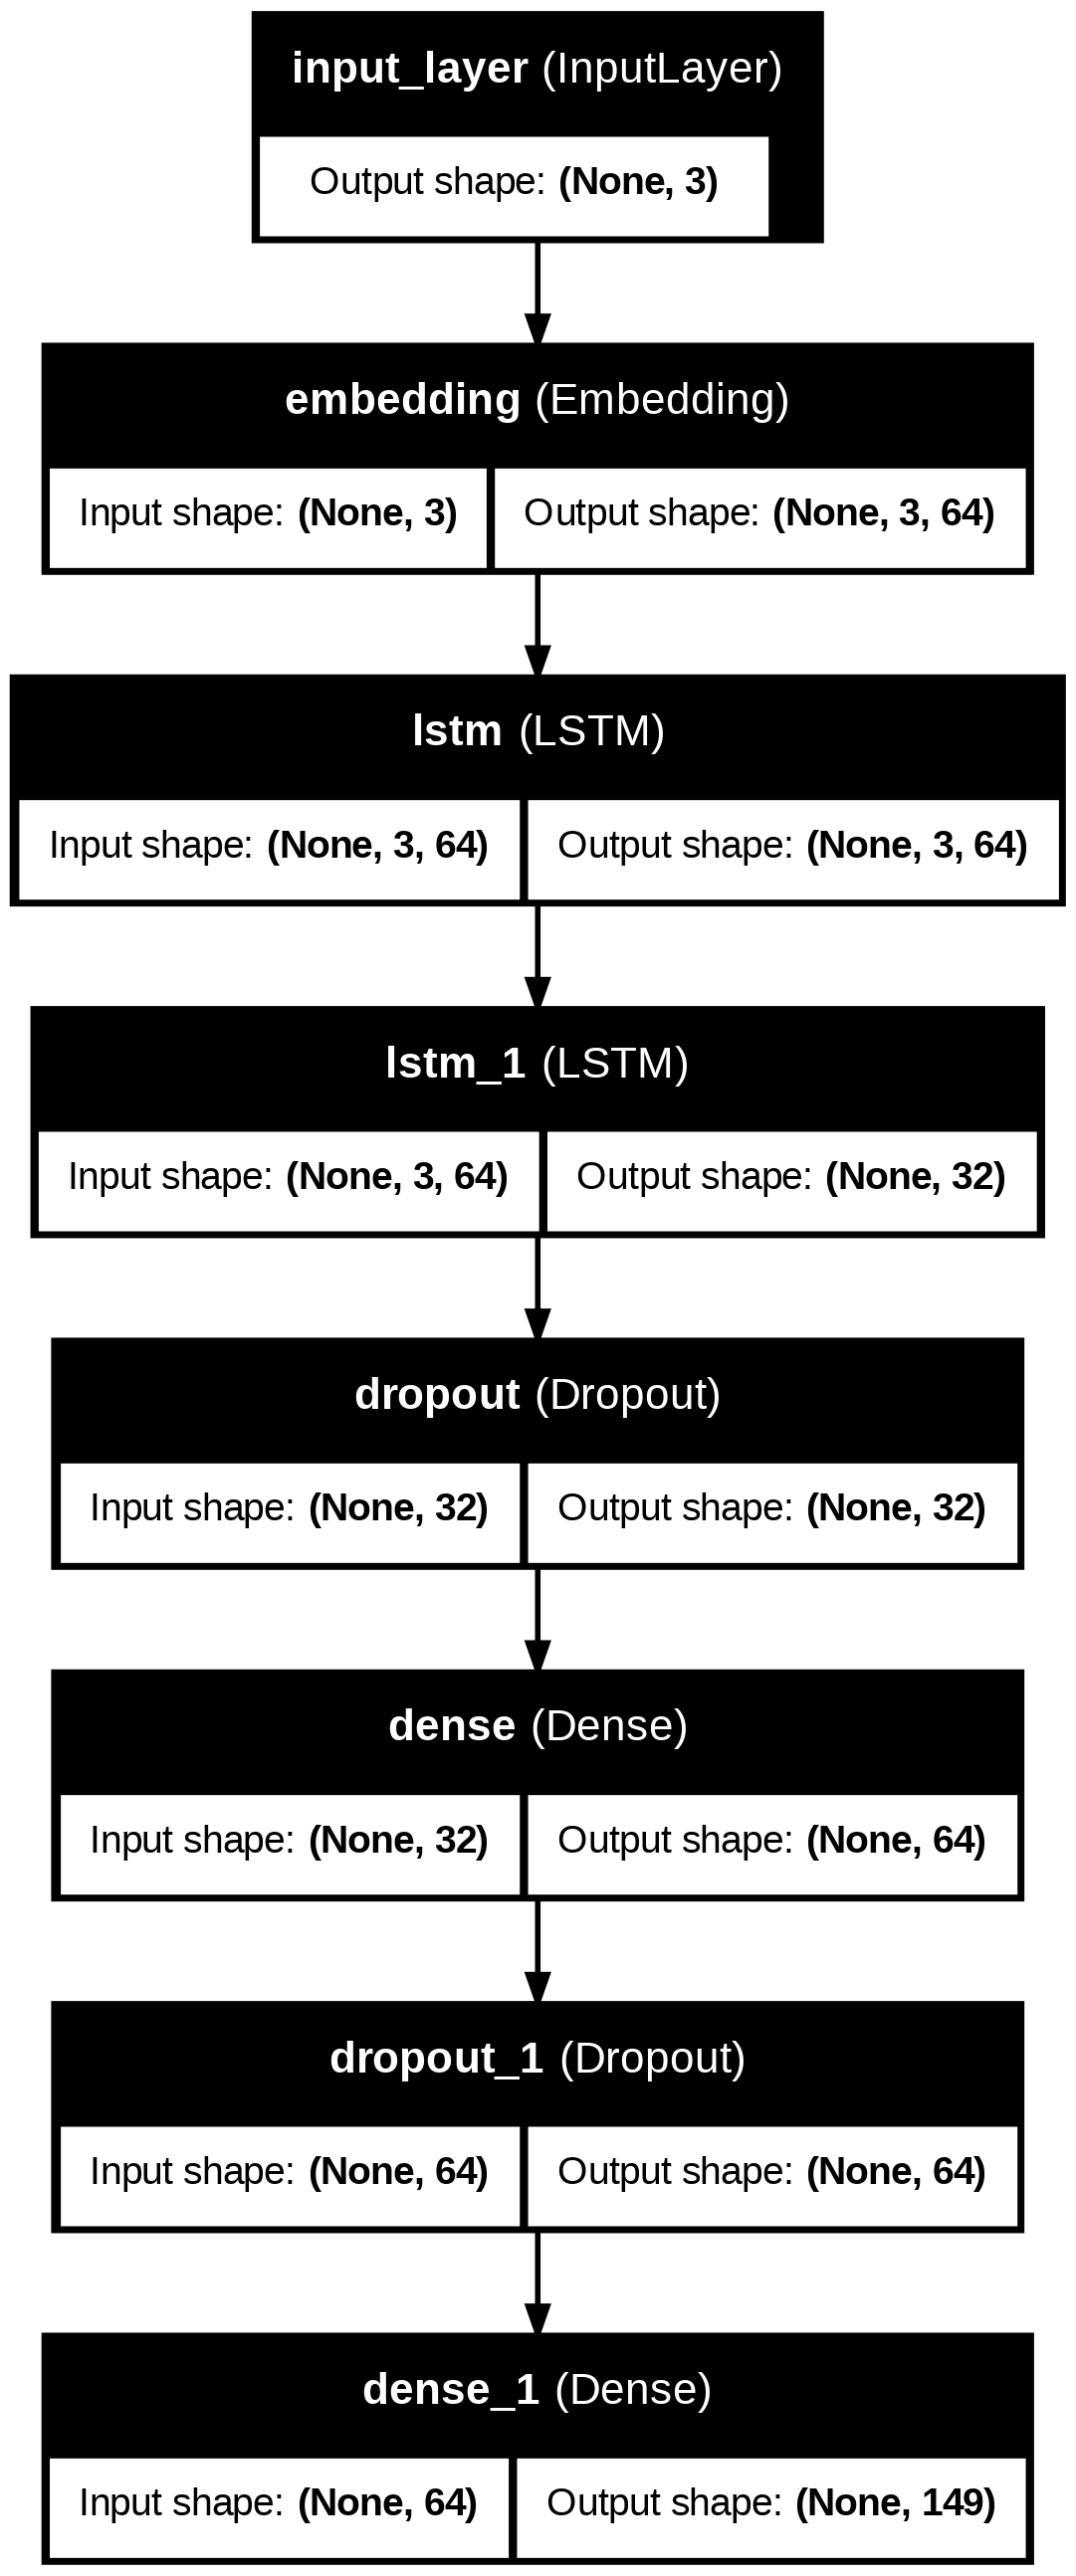

In [21]:
 #Visualization Plot Architecature Model (Visualisasi Plot Arsitektur Model)
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [22]:
# Menampilkan parameter pada model LSTM
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 3, 64)          │        12,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 3, 64)          │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 149)            │         9,685 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,525 (271.58 KB)

 Trainable params: 69,525 (271.58 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
from keras.callbacks import Callback
import numpy as np

# Custom Callback untuk menghentikan training saat accuracy >= 0.98
class StopTrainingAtAccuracy(Callback):
    def on_epoch_end(self, epoch, logs=None):
        acc = logs.get('accuracy')
        if acc is not None and acc >= 0.98:
            print(f"\n✅ Akurasi {acc:.2f} telah tercapai pada epoch {epoch+1}, training dihentikan.")
            self.model.stop_training = True

In [24]:
# Training the model (Melatih model data sampai maksimal 450 kali atau berhenti lebih awal)
train = model.fit(
    x_train,
    y_train,
    epochs=450,
    validation_split=0.2,
    callbacks=[StopTrainingAtAccuracy()]
)

Epoch 1/450
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 399ms/step - accuracy: 0.0000e+00 - loss: 5.0045 - val_accuracy: 0.0000e+00 - val_loss: 5.0078
Epoch 2/450
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.0054 - loss: 5.0032 - val_accuracy: 0.0000e+00 - val_loss: 5.0127
Epoch 3/450
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0086 - loss: 5.0010 - val_accuracy: 0.0000e+00 - val_loss: 5.0182
Epoch 4/450
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0088 - loss: 4.9996 - val_accuracy: 0.0000e+00 - val_loss: 5.0244
Epoch 5/450
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0086 - loss: 4.9969 - val_accuracy: 0.0000e+00 - val_loss: 5.0322
Epoch 6/450
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0086 - loss: 4.9955 - val_accuracy: 0.0000e+00 - val_loss: 5.0412
Epoch 7/450
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0086 - loss: 4.9924 - val_accuracy: 0.0000e+00 - val_loss: 5.0528
Epoch 8/450
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.0000e+00 - loss: 4.9

#Save Model

In [25]:
# Simpan model ke dalam format HDF5
model.save('chatbot_model.h5')

#Evaluation Model Analysis

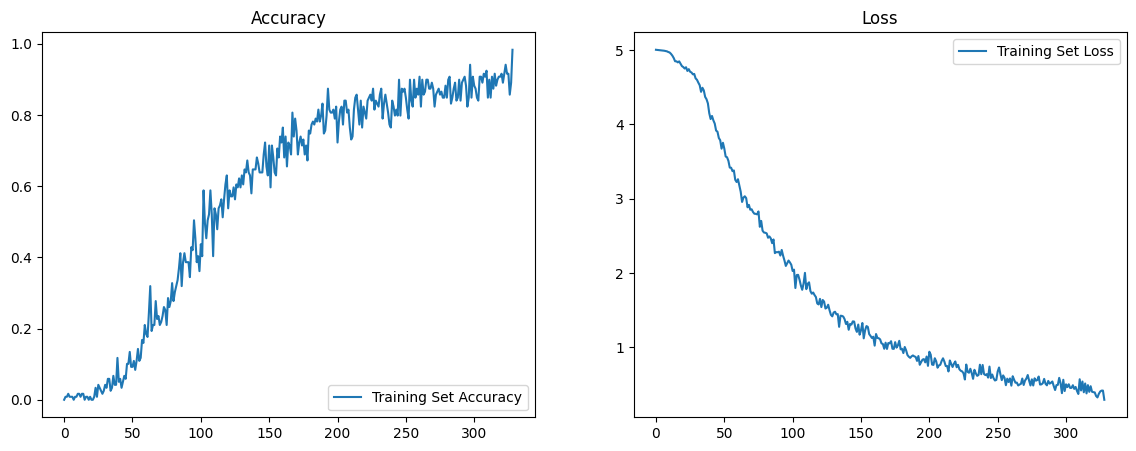

In [26]:
# Plotting model Accuracy and Loss (Visualisasi Plot Hasil Akurasi dan Loss)
# Plot Akurasi
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(train.history['accuracy'], label='Training Set Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(train.history['loss'], label='Training Set Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

In [27]:
# Membuat Input Chat
while True:
  texts_p = []
  prediction_input = input('👨‍🦰 Kamu : ')

  # Menghapus punktuasi atau tanda baca dan konversi ke huruf kecil
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  # Melakukan Tokenisasi dan Padding pada data teks
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  # Konversi data teks menjadi array
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input],input_shape)

  # Mendapatkan hasil prediksi keluaran pada model
  output = model.predict(prediction_input)
  output = output.argmax()

  # Menemukan respon sesuai data tag dan memainkan suara bot
  response_tag = le.inverse_transform([output])[0]

  # Get the responses for the predicted tag from the original DataFrame
  responses_for_tag = data[data['intent'] == response_tag]['responses'].iloc[0]

  # Bot akan melakukan random jawaban percakapan dari hasil pertanyaan
  print("🤖 KadekBot : ", random.choice(responses_for_tag))
  # Tambahkan suara bot dengan Google Text to Speech
  tts = gTTS(random.choice(responses_for_tag), lang='id')
  # Simpan model voice bot ke dalam Google Drive dengan format .wav
  tts.save('KadekBot.wav')
  # Atur waktu jeda sampai 8 detik
  time.sleep(0.08)
  # Ambil file model yang telah disimpan sebelumnya
  ipd.display(ipd.Audio('/content/KadekBot.wav', autoplay=False))
  print("="*60 + "\n")
  # Tambahkan respon 'goodbye' agar bot bisa berhenti melakukan percakapan
  if response_tag.startswith("goodbye"): # Check if the tag starts with "goodbye"
    break

👨‍🦰 Kamu : hai
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
🤖 KadekBot :  Halo! Saya Robby, salam kenal ya! Mau tau tentang pengalaman saya?


KeyboardInterrupt: Interrupted by user